# LADO

PSNR values: [np.float64(54.98453416714745), np.float64(38.70424634521665), np.float64(55.45002759914812), 100]


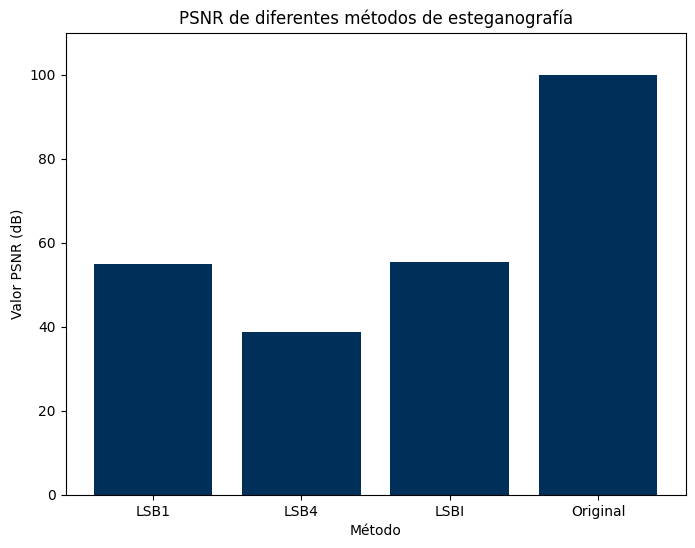

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_psnr(original, stego):
    mse = np.mean((original - stego) ** 2)
    if mse == 0:  # No differences (original vs original case)
        return float('inf')  # Return infinity when there's no difference
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Cargar imagen original
original_image = cv2.imread('./lado/lado.bmp')

if original_image is None:
    print("Error: No se pudo cargar 'porter_image.bmp'.")

# Lista de archivos steganogram para evaluar
steganograms = ['ladoLSB1.bmp', 'ladoLSB4.bmp', 'ladoLSBI.bmp', 'lado.bmp']

# Almacenar los resultados PSNR
psnr_values = []
methods = ['LSB1', 'LSB4', 'LSBI', 'Original']

for steganogram in steganograms:
    stego_image = cv2.imread(f"./lado/{steganogram}")

    if stego_image is None:
        print(f"Error: No se pudo cargar '{steganogram}'.")
        continue
    
    psnr_value = calculate_psnr(original_image, stego_image)
    
    # Manejar el caso de comparación original con original
    if np.isinf(psnr_value):
        psnr_value = 100  # Asignar un valor simbólico para representar PSNR infinito
    
    psnr_values.append(psnr_value)

print("PSNR values:", psnr_values)

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(methods, psnr_values, color='#002f59')
plt.title('PSNR de diferentes métodos de esteganografía')
plt.xlabel('Método')
plt.ylabel('Valor PSNR (dB)')
plt.ylim(0, max(psnr_values) + 10)

# Mostrar gráfico
plt.show()


# OWN

PSNR values: [np.float64(53.08786740287813), np.float64(39.76311829271999), np.float64(53.09176403252636), 100]


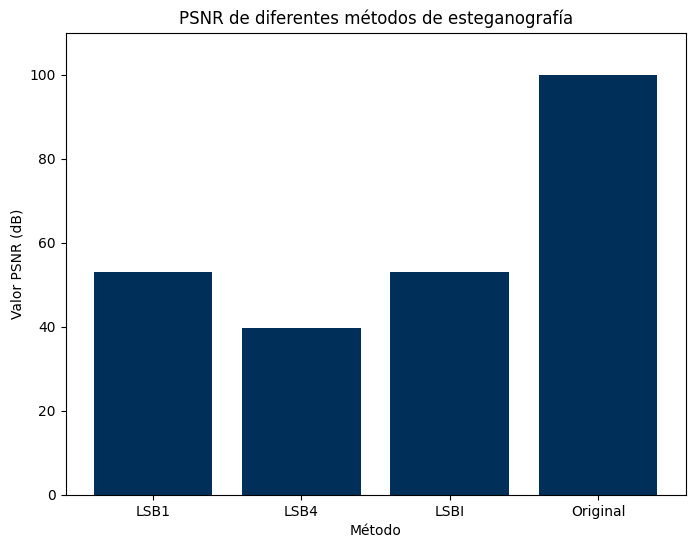

In [2]:


# Cargar imagen original
original_image = cv2.imread('porter_img.bmp')

if original_image is None:
    print("Error: No se pudo cargar 'porter_image.bmp'.")

# Lista de archivos steganogram para evaluar
steganograms = ['steganogram_lsb1.bmp', 'steganogram_lsb4.bmp', 'steganogram_lsbi.bmp', 'porter_img.bmp']

# Almacenar los resultados PSNR
psnr_values = []
methods = ['LSB1', 'LSB4', 'LSBI', 'Original']

for steganogram in steganograms:
    stego_image = cv2.imread(steganogram)

    if stego_image is None:
        print(f"Error: No se pudo cargar '{steganogram}'.")
        continue
    
    psnr_value = calculate_psnr(original_image, stego_image)
    
    # Manejar el caso de comparación original con original
    if np.isinf(psnr_value):
        psnr_value = 100  # Asignar un valor simbólico para representar PSNR infinito
    
    psnr_values.append(psnr_value)

print("PSNR values:", psnr_values)

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(methods, psnr_values, color='#002f59')
plt.title('PSNR de diferentes métodos de esteganografía')
plt.xlabel('Método')
plt.ylabel('Valor PSNR (dB)')
plt.ylim(0, max(psnr_values) + 10)

# Mostrar gráfico
plt.show()


# PEPPER Long

pepper de 512x512
head -c 65523  </dev/urandom > ./tests/robust/secret.txt

que es el máximo que lsbi puede almacenar

PSNR values: [np.float64(52.90725449200512), np.float64(39.46009946617674), np.float64(52.9092619846559), 100]


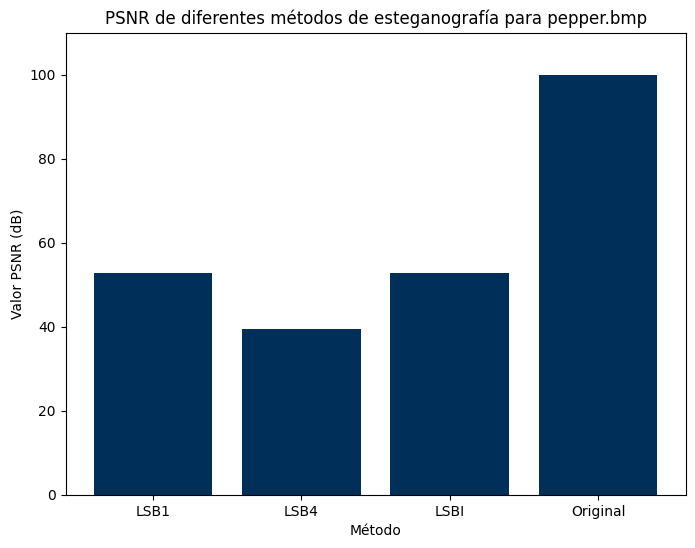

In [3]:


image = 'pepper'
methods = ['LSBI','LSB1', 'LSB4', 'Original']
# Cargar imagen original
original_image = cv2.imread(f'./robust/{image}.bmp')

if original_image is None:
    print("Error: No se pudo cargar 'porter_image.bmp'.")

# Lista de archivos steganogram para evaluar
steganograms = [f'./robust/{image}_long_lsb1.bmp',  f'./robust/{image}_long_lsb4.bmp', f'./robust/{image}_long_lsbi.bmp',  f'./robust/{image}.bmp']

# Almacenar los resultados PSNR
psnr_values = []
methods = ['LSB1', 'LSB4', 'LSBI', 'Original']

for steganogram in steganograms:
    stego_image = cv2.imread(steganogram)

    if stego_image is None:
        print(f"Error: No se pudo cargar '{steganogram}'.")
        continue
    
    psnr_value = calculate_psnr(original_image, stego_image)
    
    # Manejar el caso de comparación original con original
    if np.isinf(psnr_value):
        psnr_value = 100  # Asignar un valor simbólico para representar PSNR infinito
    
    psnr_values.append(psnr_value)

print("PSNR values:", psnr_values)

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(methods, psnr_values, color='#002f59')
plt.title('PSNR de diferentes métodos de esteganografía para pepper.bmp')
plt.xlabel('Método')
plt.ylabel('Valor PSNR (dB)')
plt.ylim(0, max(psnr_values) + 10)

# Mostrar gráfico
plt.show()


# Supposed Paper experiment

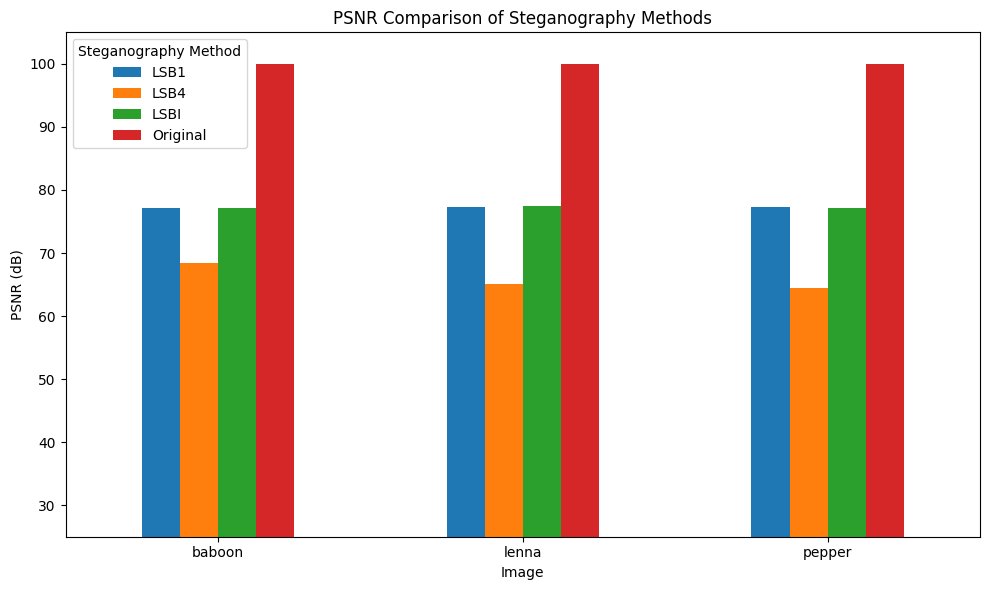

              baboon       lenna      pepper
LSB1       77.205352   77.351519   77.342298
LSB4       68.392472   65.007304   64.383888
LSBI       77.104180   77.421306   77.113552
Original  100.000000  100.000000  100.000000


In [10]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Images and steganography methods
images = ['baboon', 'lenna', 'pepper']
methods = ['LSB1', 'LSB4','LSBI',  'Original']

# Prepare dictionary to store PSNR values
psnr_values = {image: [] for image in images}

# Iterate over each image
for image in images:
    # Load the original image
    original_image = cv2.imread(f'./classics/{image}.bmp')
    
    if original_image is None:
        print(f"Error: Could not load ./classics/{image}.bmp")
        continue

    # List of steganogram files corresponding to each method
    steganograms = [f'./classics/{image}_lsb1.bmp', f'./classics/{image}_lsb4.bmp',f'./classics/{image}_lsbi.bmp',  f'./classics/{image}.bmp']

    # Calculate PSNR for each method
    for steganogram in steganograms:
        stego_image = cv2.imread(steganogram)
        
        if stego_image is None:
            print(f"Error: Could not load {steganogram}")
            psnr_values[image].append(np.nan)
            continue

        psnr_value = calculate_psnr(original_image, stego_image)
        
        # Handle the case of comparing original with original
        if np.isinf(psnr_value):
            psnr_value = 100  # Assign a symbolic value for PSNR infinity
        
        psnr_values[image].append(psnr_value)

# Convert PSNR values into a DataFrame for easier plotting
df_psnr = pd.DataFrame(psnr_values, index=methods)

# Plot the PSNR values in a barplot
df_psnr.T.plot(kind='bar', figsize=(10, 6), ylim=(25, 105))
plt.title('PSNR Comparison of Steganography Methods')
plt.ylabel('PSNR (dB)')
plt.xlabel('Image')
plt.xticks(rotation=0)
plt.legend(title='Steganography Method')
plt.tight_layout()
plt.show()

# Display the table of PSNR values
print(df_psnr)


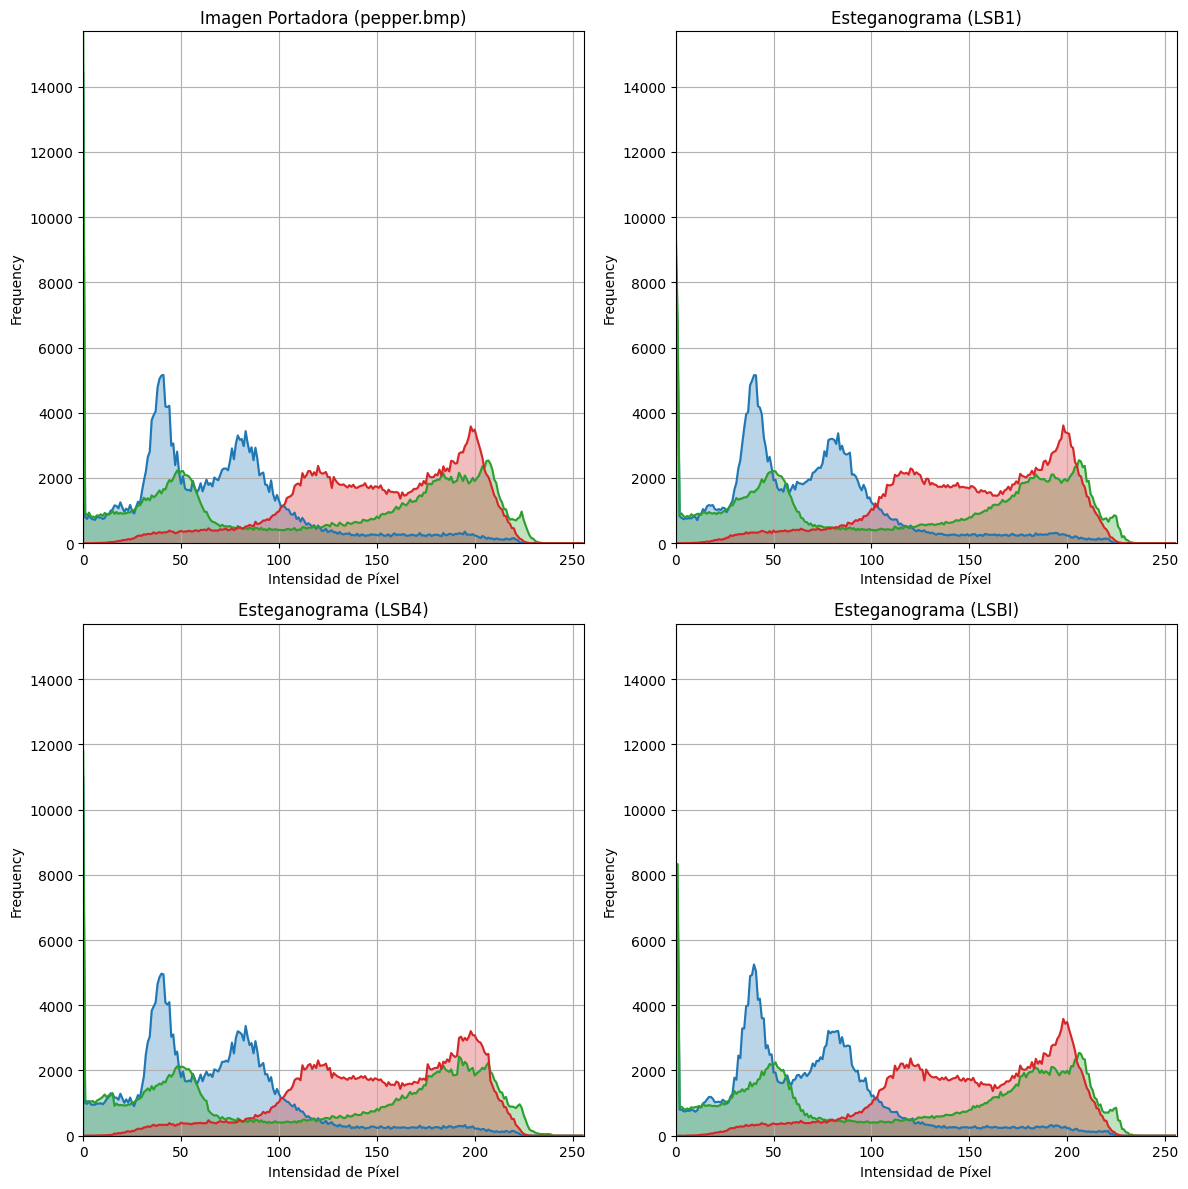

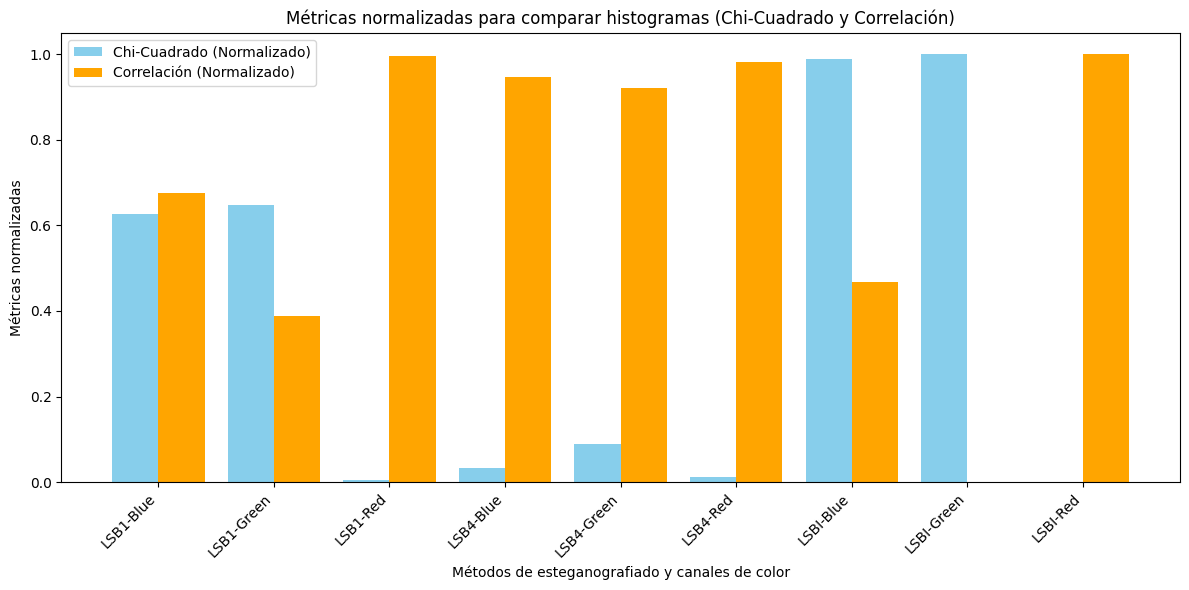

Chi-Square (Unnormalized):
               LSB1         LSB4          LSBI
Blue   39098.197366  2108.779390  61623.018259
Green  40426.276286  5541.401282  62314.092319
Red      272.728553   788.804520      0.002869

Correlation (Unnormalized):
           LSB1      LSB4      LSBI
Blue   0.939618  0.990194  0.901297
Green  0.886134  0.985314  0.814218
Red    0.999241  0.996492  1.000000


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_bgr_histogram(image, title, ax, y_max):
    """Plot the BGR histogram for a given image on a given axis with a fixed Y-axis scale."""
    color_map = {'b': '#1f77b4', 'g': '#2ca02c', 'r': '#d62728'}  # Modern color codes
    for i, col in enumerate(('b', 'g', 'r')):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256]).flatten()
        ax.plot(hist, color=color_map[col], linewidth=1.5)
        ax.fill_between(range(256), hist, color=color_map[col], alpha=0.3)
    ax.set_xlim([0, 256])
    ax.set_ylim([0, y_max])  # Set fixed y-axis limit
    ax.set_title(title)
    ax.set_xlabel('Intensidad de Píxel')
    ax.set_ylabel('Frequency')
    ax.grid(True)

def compare_histograms(hist1, hist2, method='chi-square'):
    """Compare two histograms using different methods."""
    if method == 'chi-square':
        return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    elif method == 'correlation':
        return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

def compute_histograms(image):
    """Compute the BGR histograms for a given image."""
    histograms = []
    for i in range(3):  # BGR channels
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        histograms.append(hist)
    return histograms

def normalize_scores(scores):
    """Normalize scores using min-max normalization to scale between 0 and 1."""
    min_score = min(scores)
    max_score = max(scores)
    normalized = [(score - min_score) / (max_score - min_score) for score in scores]
    return normalized

# File paths for cover image and stego images (for LSB1, LSB4, LSBI)
cover_image_path = './robust/pepper.bmp'
stego_images_paths = {
    'LSB1': './robust/pepper_long_lsb1.bmp',
    'LSB4': './robust/pepper_long_lsb4.bmp',
    'LSBI': './robust/pepper_long_lsbi.bmp'
}

# Load cover image
cover_image = cv2.imread(cover_image_path)

# Check if cover image loaded correctly
if cover_image is None:
    print(f"Error: Could not load cover image from {cover_image_path}")
else:
    # The image is loaded as BGR by OpenCV
    cover_image_bgr = cover_image

    # Collect all images and titles for plotting
    images = [cover_image_bgr]
    titles = ['Imagen Portadora (pepper.bmp)']

    for method, stego_image_path in stego_images_paths.items():
        stego_image = cv2.imread(stego_image_path)
        if stego_image is None:
            print(f"Error: Could not load stego image from {stego_image_path}")
            continue
        images.append(stego_image)
        titles.append(f'Esteganograma ({method})')

    # Find the maximum y-value (frequency) across all histograms
    y_max = 0
    for image in images:
        for i in range(3):  # BGR channels
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            y_max = max(y_max, np.max(hist))  # Update y_max with the largest value

    # Create a 2x2 grid for histograms
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    for idx, (image, title) in enumerate(zip(images, titles)):
        row = idx // 2
        col = idx % 2
        ax = axes[row, col]
        plot_bgr_histogram(image, title, ax, y_max)

    # Turn off any unused subplots
    if len(images) < 4:
        axes[1,1].axis('off')

    plt.tight_layout()
    plt.show()

    # Compute histograms and compare
    cover_histograms = compute_histograms(cover_image_bgr)
    raw_scores = {'chi-square': [], 'correlation': []}

    for idx in range(1, len(images)):
        stego_image_bgr = images[idx]
        stego_histograms = compute_histograms(stego_image_bgr)

        # Compare and store raw scores for each color channel (B, G, R)
        for i in range(3):
            chi_square_score = compare_histograms(cover_histograms[i], stego_histograms[i], method='chi-square')
            correlation_score = compare_histograms(cover_histograms[i], stego_histograms[i], method='correlation')

            raw_scores['chi-square'].append(chi_square_score)
            raw_scores['correlation'].append(correlation_score)

    # Normalize the scores for both chi-square and correlation
    normalized_chi_square = normalize_scores(raw_scores['chi-square'])
    normalized_correlation = normalize_scores(raw_scores['correlation'])

    # Create labels for bar plots
    x_labels = []
    for method in stego_images_paths.keys():
        x_labels.extend([f'{method}-Blue', f'{method}-Green', f'{method}-Red'])

    # Create bar plots for the normalized scores
    fig, ax = plt.subplots(figsize=(12, 6))

    # Bar width
    bar_width = 0.4
    x = np.arange(len(x_labels))

    # Use only two colors: one for chi-square and one for correlation
    chi_square_color = 'skyblue'
    correlation_color = 'orange'

    # Plot normalized chi-square and correlation side by side with two colors
    ax.bar(x - bar_width/2, normalized_chi_square, width=bar_width, label='Chi-Cuadrado (Normalizado)', color=chi_square_color)
    ax.bar(x + bar_width/2, normalized_correlation, width=bar_width, label='Correlación (Normalizado)', color=correlation_color)

    # Add labels and title
    ax.set_xlabel('Métodos de esteganografiado y canales de color')
    ax.set_ylabel('Métricas normalizadas')
    ax.set_title('Métricas normalizadas para comparar histogramas (Chi-Cuadrado y Correlación)')
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, rotation=45, ha="right")

    # Add a legend
    ax.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

    # Labels for rows (color channels)
    channels = ['Blue', 'Green', 'Red']

    # Separate the raw (unnormalized) values for each method and channel
    lsb1_chi = raw_scores['chi-square'][0:3]  # First three are for LSB1 (B, G, R)
    lsb4_chi = raw_scores['chi-square'][3:6]  # Next three are for LSB4 (B, G, R)
    lsbi_chi = raw_scores['chi-square'][6:9]  # Last three are for LSBI (B, G, R)

    lsb1_corr = raw_scores['correlation'][0:3]  # First three are for LSB1 (B, G, R)
    lsb4_corr = raw_scores['correlation'][3:6]  # Next three are for LSB4 (B, G, R)
    lsbi_corr = raw_scores['correlation'][6:9]  # Last three are for LSBI (B, G, R)

    # Create DataFrames for unnormalized Chi-Square and Correlation
    chi_square_df = pd.DataFrame({
        'LSB1': lsb1_chi,
        'LSB4': lsb4_chi,
        'LSBI': lsbi_chi
    }, index=channels)

    correlation_df = pd.DataFrame({
        'LSB1': lsb1_corr,
        'LSB4': lsb4_corr,
        'LSBI': lsbi_corr
    }, index=channels)

    # Display the tables with raw scores
    print("Chi-Square (Unnormalized):")
    print(chi_square_df)

    print("\nCorrelation (Unnormalized):")
    print(correlation_df)




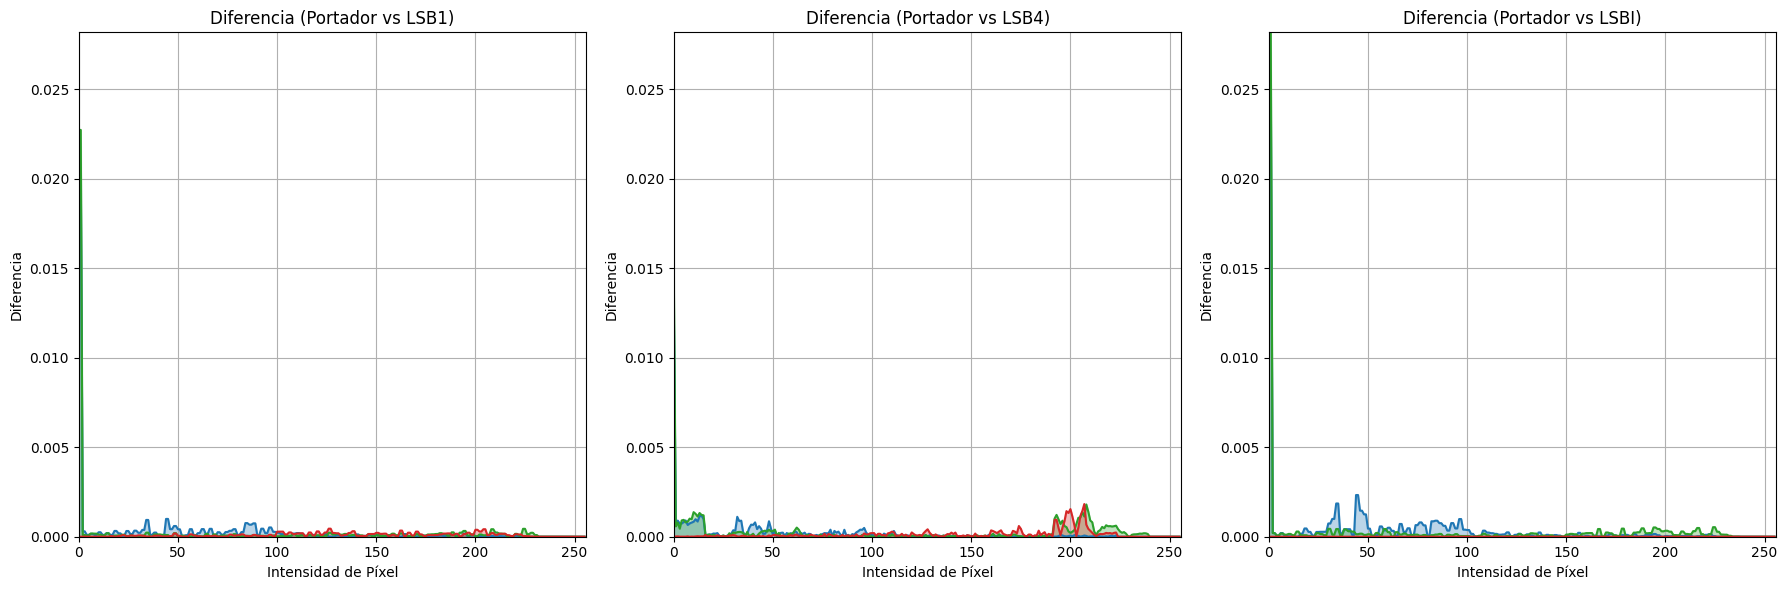

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_histograms(image, normalize=False):
    """Compute the BGR histograms for a given image, with optional normalization."""
    histograms = []
    for i in range(3):  # BGR channels
        hist = cv2.calcHist([image], [i], None, [256], [0, 256]).flatten()
        if normalize:
            hist = hist / np.sum(hist)
        histograms.append(hist)
    return histograms

def plot_histogram_differences(cover_hist, stego_hist, title, ax, y_max):
    """Plot the absolute differences between cover and stego histograms."""
    color_map = {'b': '#1f77b4', 'g': '#2ca02c', 'r': '#d62728'}
    for i, col in enumerate(('b', 'g', 'r')):
        diff = np.abs(cover_hist[i] - stego_hist[i])  # Absolute difference
        ax.plot(diff, color=color_map[col], linewidth=1.5)
        ax.fill_between(range(256), diff, color=color_map[col], alpha=0.3)
    ax.set_xlim([0, 256])
    ax.set_ylim([0, y_max])  # Set the Y-axis scale
    ax.set_title(title)
    ax.set_xlabel('Intensidad de Píxel')
    ax.set_ylabel('Diferencia')
    ax.grid(True)

def find_max_difference(cover_hist, stego_hists):
    """Find the maximum absolute difference across all histograms."""
    max_diff = 0
    for stego_hist in stego_hists:
        for i in range(3):  # For each BGR channel
            diff = np.abs(cover_hist[i] - stego_hist[i])
            max_diff = max(max_diff, np.max(diff))
    return max_diff

# File paths for cover image and stego images (for LSB1, LSB4, LSBI)
cover_image_path = './robust/pepper.bmp'
stego_images_paths = {
    'LSB1': './robust/pepper_long_lsb1.bmp',
    'LSB4': './robust/pepper_long_lsb4.bmp',
    'LSBI': './robust/pepper_long_lsbi.bmp'
}

# Load cover image
cover_image = cv2.imread(cover_image_path)

# Check if cover image loaded correctly
if cover_image is None:
    print(f"Error: Could not load cover image from {cover_image_path}")
else:
    # The image is loaded as BGR by OpenCV
    cover_image_bgr = cover_image

    # Compute histograms for cover image (normalized)
    cover_histograms = compute_histograms(cover_image_bgr, normalize=True)

    # Compute histograms for all stego images (normalized)
    stego_histograms_list = []
    for method, stego_image_path in stego_images_paths.items():
        stego_image = cv2.imread(stego_image_path)
        if stego_image is None:
            print(f"Error: Could not load stego image from {stego_image_path}")
            continue
        stego_histograms = compute_histograms(stego_image, normalize=True)
        stego_histograms_list.append(stego_histograms)

    # Find the maximum difference to set a uniform Y scale
    y_max = find_max_difference(cover_histograms, stego_histograms_list)

    # Create a figure to show the differences
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for idx, (method, stego_image_path) in enumerate(stego_images_paths.items()):
        stego_image = cv2.imread(stego_image_path)
        if stego_image is None:
            print(f"Error: Could not load stego image from {stego_image_path}")
            continue
        stego_histograms = compute_histograms(stego_image, normalize=True)
        plot_histogram_differences(cover_histograms, stego_histograms, f'Diferencia (Portador vs {method})', axes[idx], y_max)

    plt.tight_layout()
    plt.show()
